# Preprocessing Chronic kidney disease dataset in CSV format

## 1. Import and add data path

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier


In [98]:
input_csv = "../dataset/chronic_kidney_disease_full.csv"


## 2. Exploratory Data Analysis - EDA

In [99]:
# Read dataset
data = pd.read_csv(input_csv)
data.shape

(400, 26)

In [100]:
# Get columns of dataset
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [101]:
# Get shape of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [102]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [103]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [104]:
data.isna().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [105]:
data.dtypes

id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

## 3. Data Preprocessing

## 3.1. Process with categorial and numerical columns

In [106]:
categorial_cols = [col for col in data.columns if data[col].dtype == "object"]
categorial_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']

In [107]:
numerical_cols = [col for col in data.columns if not col in categorial_cols]
numerical_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

In [108]:
# Fill null values with mean values
for col in [c for c in numerical_cols if c != "id"]:
    data[col] = data[col].fillna(data[col].mean())

In [109]:
# Using onehot-encoding for categorial data
categorial_onehot_cols = ["rbc", "pc", "pcc", "ba"]
print(data[categorial_onehot_cols].isna().sum())
category_onehot = pd.get_dummies(data[categorial_onehot_cols], drop_first=True)
# category_onehot.head()
print(category_onehot.isna().sum())

rbc    152
pc      65
pcc      4
ba       4
dtype: int64
rbc_normal     0
pc_normal      0
pcc_present    0
ba_present     0
dtype: int64


In [110]:
data = data.drop(categorial_onehot_cols, axis=1)
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [111]:
data = pd.concat([data, category_onehot], axis=1)
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm,cad,appet,pe,ane,class,rbc_normal,pc_normal,pcc_present,ba_present
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,yes,no,good,no,no,ckd,False,True,False,False
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,no,no,good,no,no,ckd,False,True,False,False
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,yes,no,poor,no,yes,ckd,True,True,False,False
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,no,no,poor,yes,yes,ckd,True,False,True,False
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,no,no,good,no,no,ckd,True,True,False,False


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   age          400 non-null    float64
 2   bp           400 non-null    float64
 3   sg           400 non-null    float64
 4   al           400 non-null    float64
 5   su           400 non-null    float64
 6   bgr          400 non-null    float64
 7   bu           400 non-null    float64
 8   sc           400 non-null    float64
 9   sod          400 non-null    float64
 10  pot          400 non-null    float64
 11  hemo         400 non-null    float64
 12  pcv          400 non-null    float64
 13  wbcc         400 non-null    float64
 14  rbcc         400 non-null    float64
 15  htn          398 non-null    object 
 16  dm           398 non-null    object 
 17  cad          398 non-null    object 
 18  appet        399 non-null    object 
 19  pe      

## 3.2. Visualize

In [113]:
k = data["age"].apply(lambda x: int(x)//10).to_list()


In [114]:
a=[0]*10
for i in range(len(k)):
    a[k[i]] += 1

a

[10, 11, 23, 43, 71, 91, 96, 47, 7, 1]

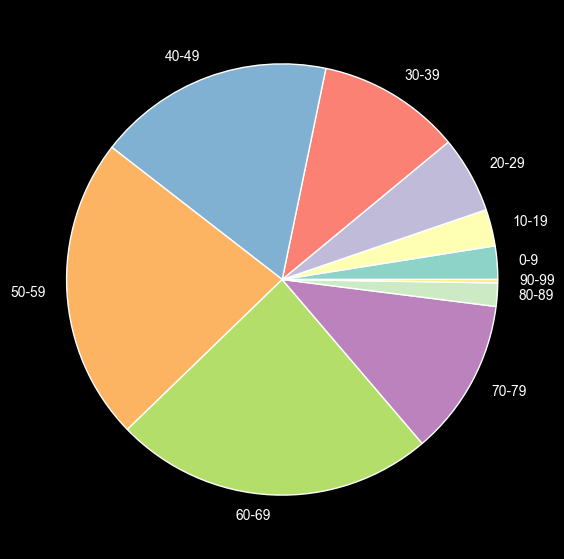

In [115]:
plt.figure(figsize = (7, 7))
x_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
y_labels = np.array(a)
plt.pie(y_labels, labels=x_labels)
plt.show()

In [116]:
data["class"].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [117]:
data = data.replace({"notckd": 0, "ckd": 1})
data[["class"]].head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18788\3777142803.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"notckd": 0, "ckd": 1})


,class
0,1
1,1
2,1
3,1
4,1


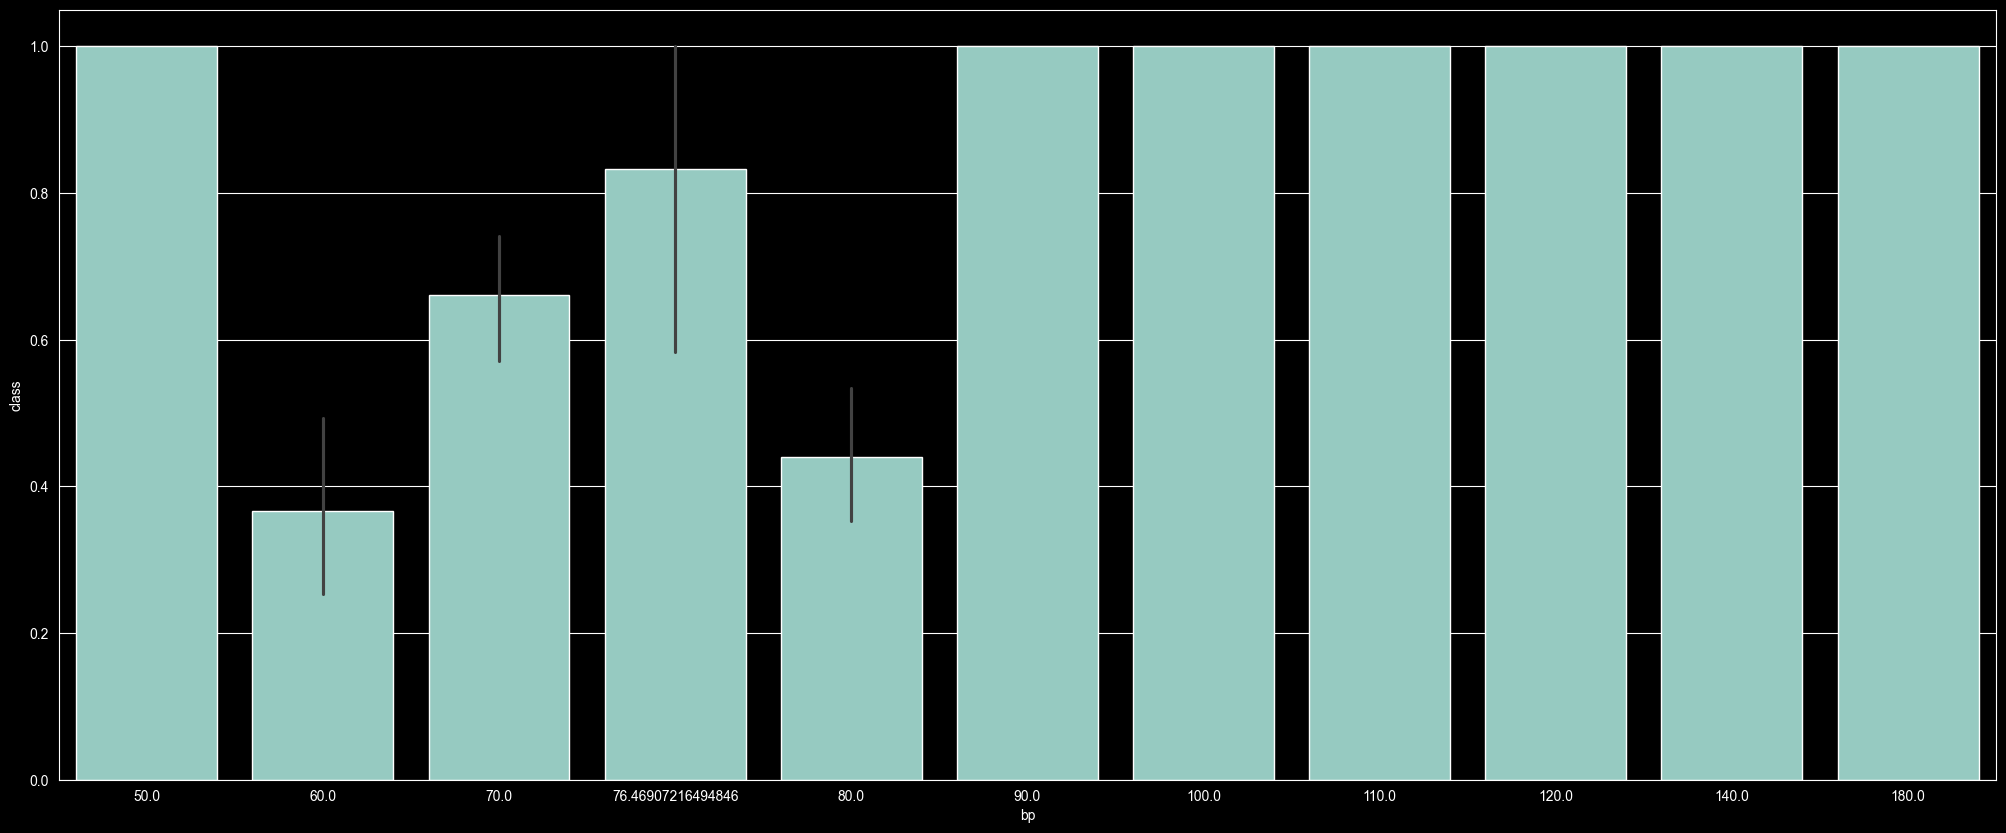

In [118]:
plt.figure(figsize=(25, 10))
sns.barplot(x=data["bp"], y=data["class"])
plt.show()

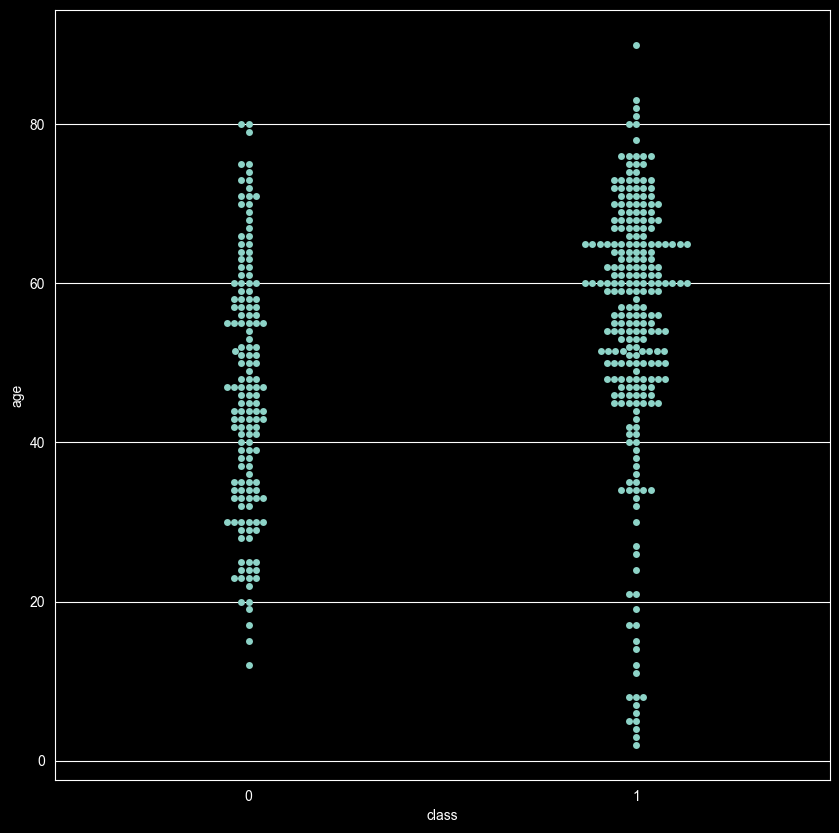

In [119]:
plt.figure(figsize=(10, 10))
sns.swarmplot(y=data["age"], x=data["class"])
plt.show()

In [120]:
data["appet"].value_counts()

appet
good    317
poor     82
Name: count, dtype: int64

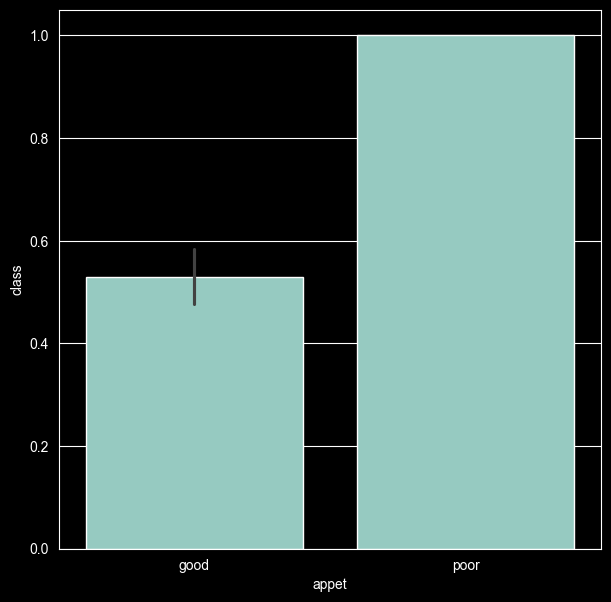

In [121]:
plt.figure(figsize=(7, 7))
sns.barplot(x=data["appet"], y=data["class"])
plt.show()

In [122]:
data = data.replace({"good":1, "poor":0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18788\2047159681.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"good":1, "poor":0})


In [123]:
data["ane"].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [124]:
data = data.replace({"no":0, "yes":1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   age          400 non-null    float64
 2   bp           400 non-null    float64
 3   sg           400 non-null    float64
 4   al           400 non-null    float64
 5   su           400 non-null    float64
 6   bgr          400 non-null    float64
 7   bu           400 non-null    float64
 8   sc           400 non-null    float64
 9   sod          400 non-null    float64
 10  pot          400 non-null    float64
 11  hemo         400 non-null    float64
 12  pcv          400 non-null    float64
 13  wbcc         400 non-null    float64
 14  rbcc         400 non-null    float64
 15  htn          398 non-null    float64
 16  dm           398 non-null    float64
 17  cad          398 non-null    float64
 18  appet        399 non-null    float64
 19  pe      

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18788\1484308948.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"no":0, "yes":1})


In [125]:
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   age          400 non-null    float64
 2   bp           400 non-null    float64
 3   sg           400 non-null    float64
 4   al           400 non-null    float64
 5   su           400 non-null    float64
 6   bgr          400 non-null    float64
 7   bu           400 non-null    float64
 8   sc           400 non-null    float64
 9   sod          400 non-null    float64
 10  pot          400 non-null    float64
 11  hemo         400 non-null    float64
 12  pcv          400 non-null    float64
 13  wbcc         400 non-null    float64
 14  rbcc         400 non-null    float64
 15  htn          400 non-null    float64
 16  dm           400 non-null    float64
 17  cad          400 non-null    float64
 18  appet        400 non-null    float64
 19  pe      

## 4. Training

## 4.1. Split data

In [126]:
data.columns
# 'sg', 'al', 'su', 'bu', 'sc', 'sod', 'pot', 'pcv', 'cad', 'pe', 'pc_normal', 'pcc_present', 'ba_present'

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'class', 'rbc_normal', 'pc_normal', 'pcc_present', 'ba_present'],
      dtype='object')

In [127]:
X = data.loc[:, ["age", "bp", "rbcc", "wbcc", "appet", "pc_normal", "htn", "hemo", "bgr", "dm", "ane"]]
y = data["class"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,bp,rbcc,wbcc,appet,pc_normal,htn,hemo,bgr,dm,ane
3,48.0,70.0,3.900000,6700.000000,0.0,False,1.0,11.2,117.0,0.0,1.0
18,60.0,100.0,4.300000,11400.000000,1.0,True,1.0,12.7,263.0,1.0,0.0
202,78.0,60.0,4.707435,8406.122449,1.0,False,0.0,8.0,114.0,1.0,1.0
250,40.0,80.0,4.500000,10400.000000,1.0,True,0.0,15.0,140.0,0.0,0.0
274,19.0,80.0,4.707435,8406.122449,1.0,True,0.0,14.4,107.0,0.0,0.0


## 4.2. Train model

### 4.2.1. Random Forest

In [129]:
model_random_forest = RandomForestClassifier()
model_random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [130]:
predictions = model_random_forest.predict(X_test)

In [131]:
print("-"*20, "Random Forest Classifier", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Accuracy of train data: ", model_random_forest.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_random_forest.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_random_forest.predict(X_test)))

-------------------- Random Forest Classifier --------------------
Mean Absolute Error:  0.0125
Accuracy of train data:  100.0
Accuracy of test data:  98.75
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [132]:
# Random Forest with Scaler
scaler = StandardScaler()
rfc = RandomForestClassifier()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
rfc.fit(X_train_scaled, y_train)
y_pred_scaled = rfc.predict(X_test_scaled)

rfc.score(X_test_scaled, y_test)

0.9625

### 4.2.2. XGradient Boost

In [133]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [134]:
print("-"*20, "XGradient Boost", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_xgboost.predict(X_test)))
print("Accuracy of train data: ", model_xgboost.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_xgboost.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_xgboost.predict(X_test)))

-------------------- XGradient Boost --------------------
Mean Absolute Error:  0.0125
Accuracy of train data:  100.0
Accuracy of test data:  98.75
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### 4.2.3. Support Vector Machine

In [135]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [136]:
print("-"*20, "Support Vector Machine", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_svm.predict(X_test)))
print("Accuracy of train data: ", model_svm.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_svm.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_svm.predict(X_test)))

-------------------- Support Vector Machine --------------------
Mean Absolute Error:  0.35
Accuracy of train data:  61.875
Accuracy of test data:  65.0
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\Lenovo\miniconda3\envs\base_python_3.10\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\miniconda3\envs\base_python_3.10\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\miniconda3\envs\base_python_3.10\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"

In [137]:
model_svm_scaled = SVC()
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

model_svm_scaled.fit(X_test_scaled, y_test)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [138]:
print("-"*20, "Support Vector Machine (with Scaler)", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_svm_scaled.predict(X_test_scaled)))
print("Accuracy of train data: ", model_svm_scaled.score(X_train_scaled, y_train)*100)
print("Accuracy of test data: ", model_svm_scaled.score(X_test_scaled, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_svm_scaled.predict(X_test_scaled)))

-------------------- Support Vector Machine (with Scaler) --------------------
Mean Absolute Error:  0.0125
Accuracy of train data:  94.6875
Accuracy of test data:  98.75
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



### 4.2.4. K-Nearest Neighbors

In [139]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [140]:
print("-"*20, "K-Nearest Neighbors", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_knn.predict(X_test)))
print("Accuracy of train data: ", model_knn.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_knn.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_knn.predict(X_test)))

-------------------- K-Nearest Neighbors --------------------
Mean Absolute Error:  0.3
Accuracy of train data:  82.5
Accuracy of test data:  70.0
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.82      0.66        28
           1       0.87      0.63      0.73        52

    accuracy                           0.70        80
   macro avg       0.71      0.73      0.70        80
weighted avg       0.76      0.70      0.71        80



In [141]:
scaler = StandardScaler()
model_knn_scaled = KNeighborsClassifier()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model_knn_scaled.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [142]:
print("-"*20, "K-Nearest Neighbors (with Scaler)", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_knn_scaled.predict(X_test_scaled)))
print("Accuracy of train data: ", model_knn_scaled.score(X_train_scaled, y_train)*100)
print("Accuracy of test data: ", model_knn_scaled.score(X_test_scaled, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_knn_scaled.predict(X_test_scaled)))

-------------------- K-Nearest Neighbors (with Scaler) --------------------
Mean Absolute Error:  0.05
Accuracy of train data:  95.0
Accuracy of test data:  95.0
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.98      0.94      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



### 4.2.5. Naive Bayes

In [143]:
model_naive_bayes = MultinomialNB()
model_naive_bayes.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [144]:
print("-"*20, "Naive Bayes", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_naive_bayes.predict(X_test)))
print("Accuracy of train data: ", model_naive_bayes.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_naive_bayes.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_naive_bayes.predict(X_test)))

-------------------- Naive Bayes --------------------
Mean Absolute Error:  0.225
Accuracy of train data:  71.875
Accuracy of test data:  77.5
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        28
           1       0.90      0.73      0.81        52

    accuracy                           0.78        80
   macro avg       0.77      0.79      0.77        80
weighted avg       0.81      0.78      0.78        80



### 4.2.6. Decision Tree

In [145]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [146]:
print("-"*20, "Decision Tree", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_dt.predict(X_test)))
print("Accuracy of train data: ", model_dt.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_dt.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_dt.predict(X_test)))

-------------------- Decision Tree --------------------
Mean Absolute Error:  0.0125
Accuracy of train data:  100.0
Accuracy of test data:  98.75
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



### 4.2.7. XGBRF Classifier



In [147]:
model_xgbrf = XGBRFClassifier()
model_xgbrf.fit(X_train, y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [148]:
print("-"*20, "XGBRF Classifier", "-"*20)

print("Mean Absolute Error: ", mean_absolute_error(y_test, model_xgbrf.predict(X_test)))
print("Accuracy of train data: ", model_xgbrf.score(X_train, y_train)*100)
print("Accuracy of test data: ", model_xgbrf.score(X_test, y_test)*100)

print("-"*70)
print("Classification Report:")
print(classification_report(y_test, model_xgbrf.predict(X_test)))

-------------------- XGBRF Classifier --------------------
Mean Absolute Error:  0.025
Accuracy of train data:  98.125
Accuracy of test data:  97.5
----------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

